## House Prices: Advanced Regression Techniques - Kaggle
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

해당 경진대회는 아래 논문의 데이터셋으로 만들어졌습니다.
http://jse.amstat.org/v19n3/decock.pdf

또한, 사이킷런 공식문서에 있는 보스턴 주택가격 데이터셋도 같은 데이터셋을 기반으로 만들어져 있습니다.

## 라이브러리 로드

In [1]:
# pandas, seaborn, numpy 를 불러옵니다.

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# seaborn style 설정

sns.set(style='darkgrid')

## 데이터셋 가져오기

In [3]:
# train 데이터를 불러옵니다.

train = pd.read_csv('data/house/train.csv', index_col='Id')
train.shape

(1460, 80)

In [4]:
# 컬럼이 모두 보이도록 설정합니다.

pd.options.display.max_columns = 100

In [5]:
# 미리보기를 합니다.

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# test 데이터셋을 불러오고 갯수를 출력해 봅니다.

test = pd.read_csv('data/house/test.csv', index_col='Id')
test.shape

(1459, 79)

In [7]:
# test 데이터셋을 미리보기 합니다.

test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# set을 활용해서 컬럼을 비교합니다.

set(train.columns.tolist()) - set(test.columns.tolist())

{'SalePrice'}

## EDA

### pandas-profiling

[pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

In [9]:
# pandas_profiling.ProfileReport?

In [10]:
# # pandas_profiling 을 통해 ProfileReport 로 간단한 eda 리포트를 만들어 봅니다.

# from pandas_profiling import ProfileReport

# profile = ProfileReport(train)
# profile.to_file(outputfile="houseoutput.html")

### histogram

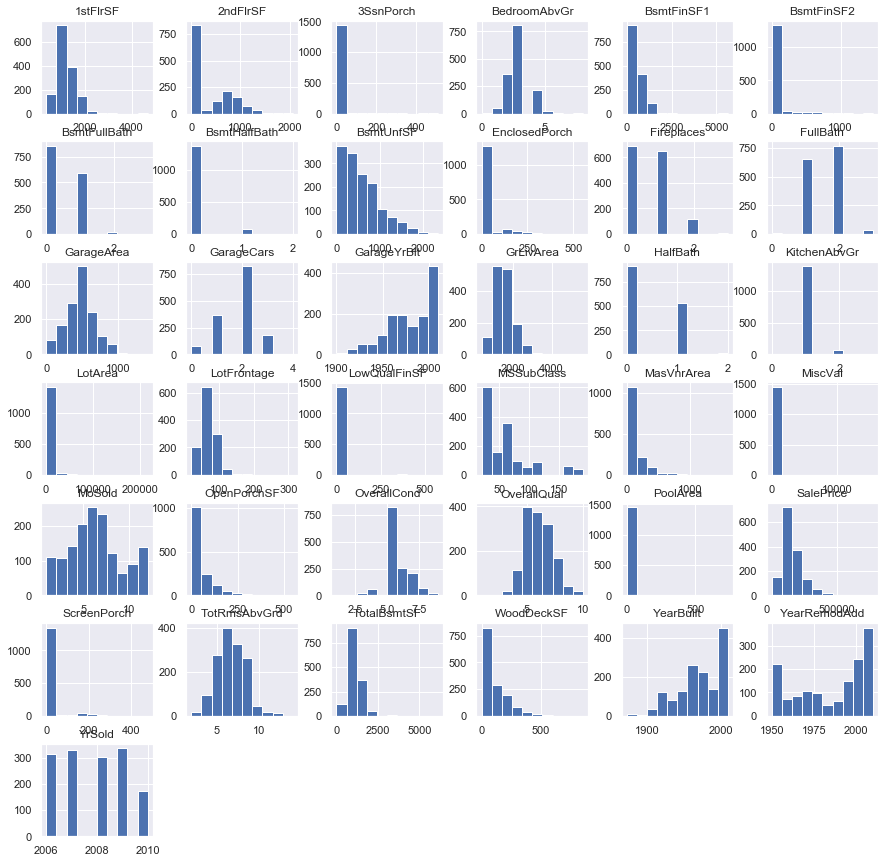

In [11]:
# 전체 변수에 대한 histogram을 그립니다. bins 옵션으로 막대의 수를 조정합니다.

h = train.hist(figsize=(15,15))

### 정답값 label 따로보기

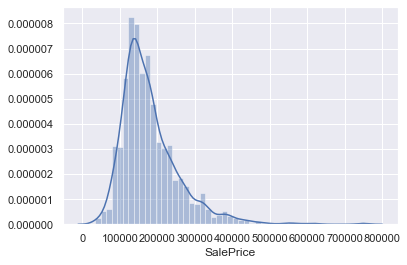

In [12]:
# SalePrice 의 distplot을 봅니다.

sns.distplot(train['SalePrice'])

In [13]:
# SalePrice 의 왜도와 첨도를 구합니다.
print("왜도(Skewness):", train['SalePrice'].skew())
print("첨도(Kurtosis):", train['SalePrice'].kurtosis())

왜도(Skewness): 1.8828757597682129
첨도(Kurtosis): 6.536281860064529


In [14]:
# SalePrice를 정규분포로 변환하고 왜도와 첨도를 구합니다.
price_log = np.log(train['SalePrice'] + 1)
price_log1p = np.log1p(train['SalePrice'])
print("왜도(Skewness):",price_log.skew())
print("첨도(Kurtosis):",price_log.kurtosis())

왜도(Skewness): 0.12134661989685333
첨도(Kurtosis): 0.809519155707878


In [15]:
print("왜도(Skewness):",price_log1p.skew())
print("첨도(Kurtosis):",price_log1p.kurtosis())

왜도(Skewness): 0.12134661989685333
첨도(Kurtosis): 0.809519155707878


In [19]:
price_log.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

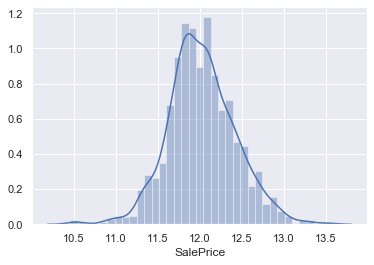

In [16]:
# SalePrice 를 정규분포 형태로 그립니다.

sns.distplot(price_log)

In [18]:
# 로그함수, 지수함수 적용
train['SalePrice_log'] = np.log(train['SalePrice'] + 1)
train['SalePrice_exp'] = np.exp(train['SalePrice_log']) - 1

train[['SalePrice', 'SalePrice_log', 'SalePrice_exp']].head()

,SalePrice,SalePrice_log,SalePrice_exp
Id,,,
1,208500,12.247699,208500.0
2,181500,12.109016,181500.0
3,223500,12.317171,223500.0
4,140000,11.849405,140000.0
5,250000,12.429220,250000.0


### 결측치 보기
* [Missing data - Wikipedia](https://en.wikipedia.org/wiki/Missing_data)

In [20]:
# 결측치가 얼마나 되는지 봅니다.

train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
LotConfig          0
dtype: int64

### 집값과 상관계수가 높은 데이터 보기

In [17]:
# 상관계수를 구하기 전에 수치형 데이터만 불러옵니다.



In [18]:
# 상관계수의 값 차이를 style.background_gradient() 로 색상으로 구분해서 봅니다.



In [19]:
# SalePrice와 상관계수가 특정 수치 이상인 데이터만 봅니다.



In [20]:
# SalePrice와 상관계수가 특정 수치 이상인 변수의 인덱스를 봅니다.



In [21]:
# pairplot을 모든 변수에 대해 그리면 오래 걸립니다.
# 위에서 그렸던 상관계수가 높은 변수만 그려봅니다.
# 이상치, 상관계수, 왜도, 첨도 등을 한눈에 볼 수 있습니다.



In [22]:
# lmplot으로 상관계수가 SalePrice와 가장 높은 변수의 회귀선을 그립니다.
# 이때 범주형 변수인 SaleCondition, SaleType 에 따라 색상과 컬럼을 따로 그립니다.



### 왜도 Skewness

* [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)
* 확률 이론 및 통계학에서, 비대칭도(非對稱度, skewness) 또는 왜도(歪度)실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

In [23]:
# 왜도가 특정 수치 이상인 데이터를 따로 봅니다.
# 마이너스 값이 나올 수 있기 때문에 절대값을 씌우고 봅니다.
# 왜도가 큰 값을 skewed_col 변수에 담습니다.



In [24]:
# 왜도가 큰 값만 따로 pairplot으로 그립니다.



In [25]:
# 왜도를 줄여주기
# 로그변환을 통해 값의 차이가 많이 나는 것을 줄여줍니다.


## Feature Engineering
### 수치형 타입만 가져오기
* 모든 컬럼을 feature 로 사용하기 전에 바로 사용할 수 있는 수치 데이터를 먼저 사용합니다.

In [24]:
# feature_names list 만들기
# 수치형 변수만 가져오기
feature_names = test.dtypes[test.dtypes !='object'].index.tolist()
feature_names

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [25]:
# feature_names = test_ohe.columns.tolist()
len(feature_names)

36

In [26]:
# label_name 변수에 예측에 사용할 정답 값 지정하기

label_name = 'SalePrice'

### Feature 만들기
* 학습과 예측에 사용할 데이터셋 만들기

In [36]:
# X_train 만들기 - 학습에 사용할 데이터셋 예) 기출문제

X_train = train[feature_names]
X_train.shape

(1460, 36)

In [37]:
# y_train 만들기 - 학습에 사용할 정답값 예) 기출문제의 정답

y_train = train[label_name]
y_train = np.log1p(y_train)
y_train.shape

(1460,)

In [38]:
# X_test - 예측에 사용할 데이터셋 예) 실전 시험문제

X_test = test[feature_names]
X_test.shape

(1459, 36)

### 수치형 변수 결측치 채우기
* 임의의 값으로 채우기
* 평균, 중앙값으로 채우기
* 제거하기
* 머신러닝 기법으로 채우기
* [Imputing missing values before building an estimator — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)

In [39]:
# X_train의 결측치를 fillna 로 채우기

X_train = X_train.fillna(0)
X_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [40]:
# X_test의 결측치를 fillna 로 채우기

X_test = X_test.fillna(0)
X_test.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## 머신러닝으로 예측하기

In [41]:
# 머신러닝 모델을 불러옵니다.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### KFold 로 Cross Validation 하기

In [43]:
# KFold 를 사용해서 분할을 나눕니다.

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

### cross_val_score 와 cross_val_predict 로 점수 구하기

In [44]:
y_train.mean()

12.024057394918371

In [45]:
# cross_val_score 로 점수를 계산합니다.
# scoring='neg_root_mean_squared_error'
# cv_results 에 결과값을 담고 평균을 구합니다.
# train은 정답값이 주어지지 않아서 train으로 예측 확인

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, X_train, y_train,
                           cv=kf, n_jobs=-1,
                           scoring='neg_root_mean_squared_error')
abs(cv_score).mean()

0.14852547222989673

In [46]:
# cross_val_predict 로 예측 결과를 구합니다.
# y_cv_pred 에 결과를 담습니다.

from sklearn.model_selection import cross_val_predict

y_cv_train = cross_val_predict(model, X_train, y_train,
                               cv=kf, n_jobs=-1)
y_cv_train

array([12.24429686, 12.01601743, 12.273429  , ..., 12.42258334,
       11.76802853, 11.94385541])

### RMSE

In [47]:
# 직접 RMSE로 오차를 구합니다.

np.sqrt(np.square(y_train - y_cv_train).mean())

0.1487182644141495

In [166]:
# # RMSLE
# np.sqrt(np.square(np.log(y_train + 1) - np.log(y_cv_train + 1)).mean())

### 실제값과 예측값 비교하기

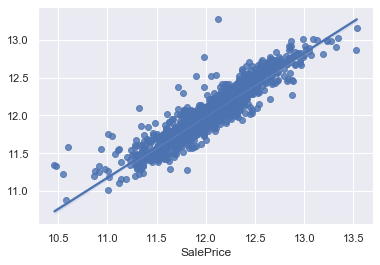

In [48]:
# regplot 으로 예측값에 대한 회귀선 그리기
sns.regplot(x=y_train, y=y_cv_train)

In [49]:
# r2스코어로 회귀선의 기울기 구하기

from sklearn.metrics import r2_score

r2_score(y_train, y_cv_train)

0.8612915528083099

In [50]:
sns.set(font='Malgun Gothic')

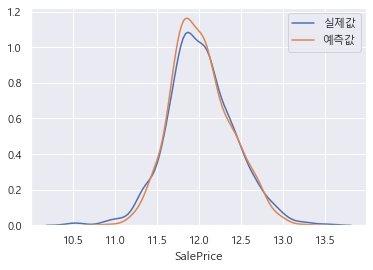

In [51]:
# distplot의 kdeplot으로 실제값과 예측값 비교하기

sns.distplot(y_train, hist=False, label='실제값')
sns.distplot(y_cv_train, hist=False, label='예측값')

## 학습(훈련)과 예측

In [52]:
X_train.shape

(1460, 36)

In [53]:
X_test.shape

(1459, 36)

In [54]:
# 학습하고 예측하기
# 모의고사를 풀어보고 바로 실전을 풀어봅니다.

y_pred = model.fit(X_train, y_train).predict(X_test)
y_pred[:5]

array([11.73435424, 11.93998094, 12.07885373, 12.11446347, 12.18364601])

### 피처 중요도 보기

In [55]:
feature_names = X_train.columns.tolist()

In [56]:
# 피처 중요도 보기

feature_importances = model.feature_importances_

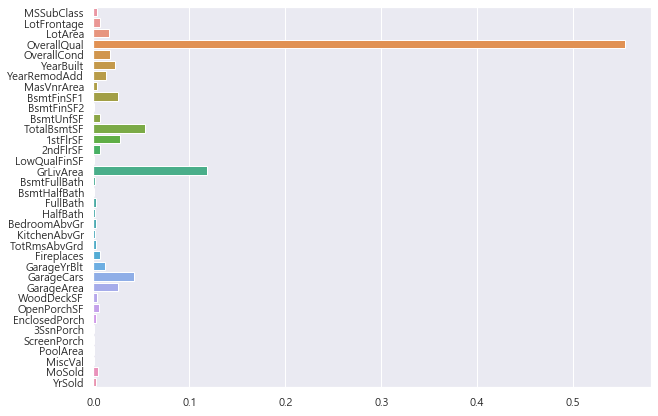

In [57]:
# 시각화 하기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.barplot(x=feature_importances, y=feature_names)

## Submit

In [58]:
# 제출 파일 양식을 불러옵니다.

submit = pd.read_csv('data/house/sample_submission.csv', index_col='Id')

In [59]:
# 정답을 옮겨 적습니다.

submit[label_name] = np.expm1(y_pred)
submit.head()

,SalePrice
Id,
1461,124784.837248
1462,153272.768854
1463,176107.177596
1464,182491.337974
1465,195563.593675


In [60]:
# csv 파일로 저장합니다.

submit.to_csv('data/house/submit.csv')

In [61]:
# 제대로 저장되었는지 확인합니다.

pd.read_csv('data/house/submit.csv').head()

,Id,SalePrice
0,1461,124784.837248
1,1462,153272.768854
2,1463,176107.177596
3,1464,182491.337974
4,1465,195563.593675
